In [173]:
import json
import numpy as np
from glob import glob
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [22]:
datasets = glob("TS-FG-AJ1-Low-Dataset-*.txt")
print(datasets)
ts_low_data = []
for d in datasets:
    with open(d) as f:
        ts_low_data.extend(json.loads(f.read()))

['TS-FG-AJ1-Low-Dataset-9.5.txt', 'TS-FG-AJ1-Low-Dataset-10.5.txt', 'TS-FG-AJ1-Low-Dataset-8.5.txt', 'TS-FG-AJ1-Low-Dataset-7.txt', 'TS-FG-AJ1-Low-Dataset-6.5.txt', 'TS-FG-AJ1-Low-Dataset-10.txt', 'TS-FG-AJ1-Low-Dataset-11.txt', 'TS-FG-AJ1-Low-Dataset-8.txt', 'TS-FG-AJ1-Low-Dataset-9.txt', 'TS-FG-AJ1-Low-Dataset-7.5.txt']


In [26]:
datasets = glob("TS-FG-AJ1-HIGH-Dataset-*.txt")
print(datasets)
ts_high_data = []
for d in datasets:
    with open(d) as f:
        ts_high_data.extend(json.loads(f.read()))

['TS-FG-AJ1-HIGH-Dataset-7.txt', 'TS-FG-AJ1-HIGH-Dataset-7.5.txt', 'TS-FG-AJ1-HIGH-Dataset-11.txt', 'TS-FG-AJ1-HIGH-Dataset-10.txt', 'TS-FG-AJ1-HIGH-Dataset-6.5.txt', 'TS-FG-AJ1-HIGH-Dataset-8.5.txt', 'TS-FG-AJ1-HIGH-Dataset-9.5.txt', 'TS-FG-AJ1-HIGH-Dataset-8.txt', 'TS-FG-AJ1-HIGH-Dataset-9.txt', 'TS-FG-AJ1-HIGH-Dataset-10.5.txt']


In [24]:
print(len(ts_low_data))

1878


In [44]:
raw = pd.DataFrame(ts_low_data)
# Add feature before official release, 0 represents no and 1 represents yes
# Split “createAt" into three columns: "Year", "Month", "Day"
raw

,amount,chainId,createdAt,customerId,localAmount,localCurrency,productId,shoeSize,skuUuid,state
0,1507.0000,13665926133803207460,2021-08-16T19:12:18+00:00,None,1507,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
1,1348.7736,13665385203497714549,2021-08-16T17:53:46+00:00,None,1349,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
2,1475.0000,13666173114808948235,2021-08-16T17:26:39+00:00,None,1475,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
3,1399.6889,13666044312279077392,2021-08-16T16:10:26+00:00,None,1400,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
4,1518.0000,13665853846859184261,2021-08-16T13:52:43+00:00,None,1518,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
5,1425.0000,13663940597925800423,2021-08-16T12:28:25+00:00,None,1425,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
6,1435.0000,13665932121110181128,2021-08-16T09:27:48+00:00,None,1435,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
7,1593.3580,13665825527473240952,2021-08-16T06:43:46+00:00,None,1594,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
8,1410.6933,13665357257736290088,2021-08-16T05:14:32+00:00,None,1411,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480
9,1450.0000,13665729910621327446,2021-08-16T02:46:04+00:00,None,1450,USD,None,9.5,6fbcd21a-4339-42d5-9aed-c9f707b7bbdd,480


In [57]:
training_data = []

In [81]:
timestamps = raw["createdAt"].tolist()
year, month, day, hour, minute, second = [], [], [], [], [], []
for t in timestamps:
    ymd, hms = t[:-6].split("T")
    y, m, d = ymd.split("-")
    h, mi, s = hms.split(":")
    year.append(int(y))
    month.append(int(m))
    day.append(int(d))
    hour.append(int(h))
    minute.append(int(mi))
    second.append(int(s))
training_data.append(year)
training_data.append(month)
training_data.append(day)
training_data.append(hour)
training_data.append(minute)
training_data.append(second)

[2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 202

In [60]:
price = raw["localAmount"].tolist()
training_data.append(price)

In [65]:
release = []
for d in day:
    if int(d) >= 13:
        release.append(1)
    else:
        release.append(0)
training_data.append(release)

In [82]:
size = raw["shoeSize"].tolist()
size = [float(n) for n in size]
size

[9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5,
 9.5

In [83]:
new_training_data = list(zip(year, month, day, hour, minute, second, price, release, size))

In [84]:
for i in new_training_data[:10]:
    print(i)

(2021, 8, 16, 19, 12, 18, 1507, 1, 9.5)
(2021, 8, 16, 17, 53, 46, 1349, 1, 9.5)
(2021, 8, 16, 17, 26, 39, 1475, 1, 9.5)
(2021, 8, 16, 16, 10, 26, 1400, 1, 9.5)
(2021, 8, 16, 13, 52, 43, 1518, 1, 9.5)
(2021, 8, 16, 12, 28, 25, 1425, 1, 9.5)
(2021, 8, 16, 9, 27, 48, 1435, 1, 9.5)
(2021, 8, 16, 6, 43, 46, 1594, 1, 9.5)
(2021, 8, 16, 5, 14, 32, 1411, 1, 9.5)
(2021, 8, 16, 2, 46, 4, 1450, 1, 9.5)


In [86]:
training_data_array = np.array(new_training_data)

In [87]:
training_data_array

array([[2.021e+03, 8.000e+00, 1.600e+01, ..., 1.507e+03, 1.000e+00,
        9.500e+00],
       [2.021e+03, 8.000e+00, 1.600e+01, ..., 1.349e+03, 1.000e+00,
        9.500e+00],
       [2.021e+03, 8.000e+00, 1.600e+01, ..., 1.475e+03, 1.000e+00,
        9.500e+00],
       ...,
       [2.021e+03, 8.000e+00, 5.000e+00, ..., 1.615e+03, 0.000e+00,
        7.500e+00],
       [2.021e+03, 8.000e+00, 5.000e+00, ..., 1.581e+03, 0.000e+00,
        7.500e+00],
       [2.021e+03, 8.000e+00, 5.000e+00, ..., 2.521e+03, 0.000e+00,
        7.500e+00]])

In [164]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(training_data_array)

In [165]:
scaled_data

array([[0.        , 1.        , 0.51724138, ..., 0.29182692, 1.        ,
        0.66666667],
       [0.        , 1.        , 0.51724138, ..., 0.21586538, 1.        ,
        0.66666667],
       [0.        , 1.        , 0.51724138, ..., 0.27644231, 1.        ,
        0.66666667],
       ...,
       [0.        , 1.        , 0.13793103, ..., 0.34375   , 0.        ,
        0.22222222],
       [0.        , 1.        , 0.13793103, ..., 0.32740385, 0.        ,
        0.22222222],
       [0.        , 1.        , 0.13793103, ..., 0.77932692, 0.        ,
        0.22222222]])

In [166]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [167]:
reframed = series_to_supervised(scaled_data, 1, 1)
reframed.drop(reframed.columns[[9, 10, 11, 12, 13, 14, 16, 17]], axis=1, inplace=True)

In [168]:
print(reframed.info())
reframed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 1 to 1877
Data columns (total 10 columns):
var1(t-1)    1877 non-null float64
var2(t-1)    1877 non-null float64
var3(t-1)    1877 non-null float64
var4(t-1)    1877 non-null float64
var5(t-1)    1877 non-null float64
var6(t-1)    1877 non-null float64
var7(t-1)    1877 non-null float64
var8(t-1)    1877 non-null float64
var9(t-1)    1877 non-null float64
var7(t)      1877 non-null float64
dtypes: float64(10)
memory usage: 161.3 KB
None


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var7(t)
1,0.0,1.0,0.517241,0.826087,0.203390,0.305085,0.291827,1.0,0.666667,0.215865
2,0.0,1.0,0.517241,0.739130,0.898305,0.779661,0.215865,1.0,0.666667,0.276442
3,0.0,1.0,0.517241,0.739130,0.440678,0.661017,0.276442,1.0,0.666667,0.240385
4,0.0,1.0,0.517241,0.695652,0.169492,0.440678,0.240385,1.0,0.666667,0.297115
5,0.0,1.0,0.517241,0.565217,0.881356,0.728814,0.297115,1.0,0.666667,0.252404
6,0.0,1.0,0.517241,0.521739,0.474576,0.423729,0.252404,1.0,0.666667,0.257212
7,0.0,1.0,0.517241,0.391304,0.457627,0.813559,0.257212,1.0,0.666667,0.333654
8,0.0,1.0,0.517241,0.260870,0.728814,0.779661,0.333654,1.0,0.666667,0.245673
9,0.0,1.0,0.517241,0.217391,0.237288,0.542373,0.245673,1.0,0.666667,0.264423
10,0.0,1.0,0.517241,0.086957,0.779661,0.067797,0.264423,1.0,0.666667,0.332692


In [169]:
train_days = 1500
valid_days = 200
values = reframed.values
train = values[:train_days, :]
valid = values[train_days:train_days+valid_days, :]
test = values[train_days+valid_days:, :]
train_X, train_y = train[:, :-1], train[:, -1]
valid_X, valid_y = valid[:, :-1], valid[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [170]:
print(train_X.shape, train_y.shape)
print(valid_X.shape, valid_y.shape)
print(test_X.shape, test_y.shape)

(1500, 9) (1500,)
(200, 9) (200,)
(177, 9) (177,)


In [171]:
train_X_reshape = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valid_X_reshape = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
test_X_reshape = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X_reshape.shape, train_y.shape, valid_X_reshape.shape, valid_y.shape, test_X_reshape.shape, test_y.shape)

(1500, 1, 9) (1500,) (200, 1, 9) (200,) (177, 1, 9) (177,)


In [174]:
model1 = Sequential()
model1.add(LSTM(50, activation='relu',input_shape=(1, 9), return_sequences=True))
model1.add(Flatten())
model1.add(Dense(1, activation='linear'))
model1.compile(loss='mean_squared_error', optimizer='adam')

In [179]:
print(train_X_reshape.shape)
# fit network
my_lstm = model1.fit(train_X_reshape, train_y, epochs=1000, batch_size=8, validation_data=(valid_X_reshape, valid_y), verbose=2, shuffle=False)

(1500, 1, 9)
Train on 1500 samples, validate on 200 samples
Epoch 1/1000
 - 1s - loss: 0.0026 - val_loss: 0.0047
Epoch 2/1000
 - 1s - loss: 0.0026 - val_loss: 0.0040
Epoch 3/1000
 - 0s - loss: 0.0023 - val_loss: 0.0040
Epoch 4/1000
 - 0s - loss: 0.0023 - val_loss: 0.0049
Epoch 5/1000
 - 0s - loss: 0.0023 - val_loss: 0.0055
Epoch 6/1000
 - 0s - loss: 0.0022 - val_loss: 0.0050
Epoch 7/1000
 - 1s - loss: 0.0021 - val_loss: 0.0047
Epoch 8/1000
 - 1s - loss: 0.0020 - val_loss: 0.0048
Epoch 9/1000
 - 1s - loss: 0.0019 - val_loss: 0.0047
Epoch 10/1000
 - 1s - loss: 0.0019 - val_loss: 0.0045
Epoch 11/1000
 - 1s - loss: 0.0018 - val_loss: 0.0035
Epoch 12/1000
 - 1s - loss: 0.0019 - val_loss: 0.0038
Epoch 13/1000
 - 1s - loss: 0.0019 - val_loss: 0.0043
Epoch 14/1000
 - 0s - loss: 0.0018 - val_loss: 0.0046
Epoch 15/1000
 - 0s - loss: 0.0018 - val_loss: 0.0044
Epoch 16/1000
 - 1s - loss: 0.0018 - val_loss: 0.0045
Epoch 17/1000
 - 1s - loss: 0.0018 - val_loss: 0.0043
Epoch 18/1000
 - 0s - loss: 0.0

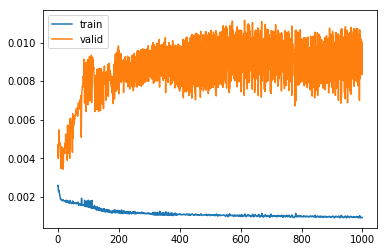

In [180]:
# plot history
plt.plot(my_lstm.history['loss'], label='train')
plt.plot(my_lstm.history['val_loss'], label='valid')
plt.legend()
plt.show()

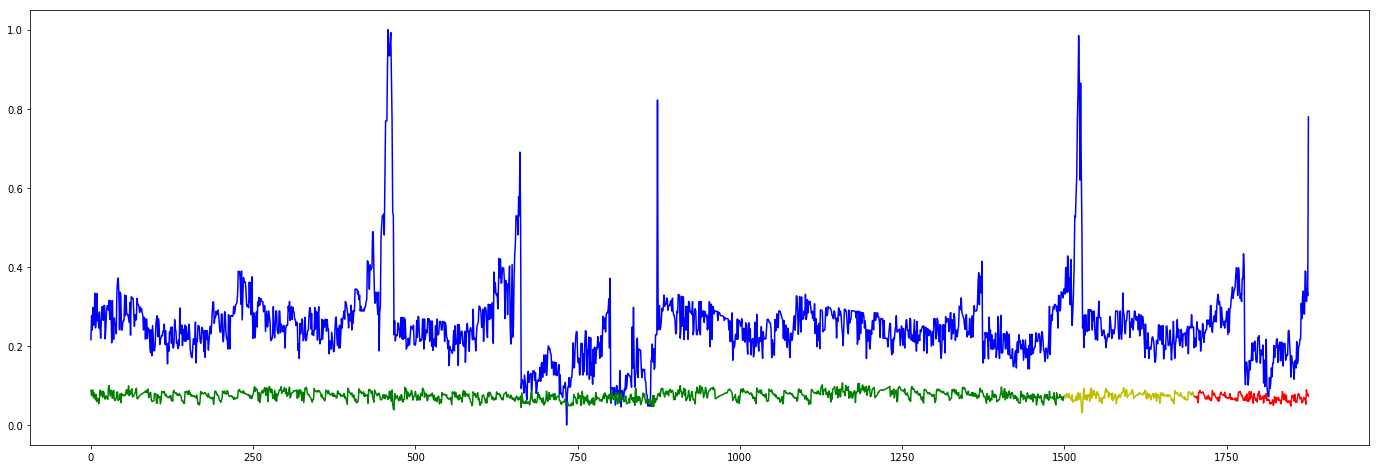

In [181]:
plt.figure(figsize=(24,8))
train_predict = model.predict(train_X_reshape).reshape(-1,)
valid_predict = model.predict(valid_X_reshape).reshape(-1,)
test_predict = model.predict(test_X_reshape)
plt.plot(values[:, -1], c='b')
plt.plot([x for x in train_predict], c='g')
plt.plot([None for _ in train_predict] + [x for x in valid_predict], c='y')
plt.plot([None for _ in train_predict] + [None for _ in valid_predict] + [x for x in test_predict], c='r')
plt.show()

In [27]:
print(len(ts_high_data))

596


In [18]:
myjson[249]

{'amount': 1738,
 'chainId': '13658565004660366198',
 'createdAt': '2021-08-06T06:25:17+00:00',
 'customerId': None,
 'localAmount': 1738,
 'localCurrency': 'USD',
 'productId': None,
 'shoeSize': '9',
 'skuUuid': 'ff9cf4bc-d4b6-4fc2-8dc3-9ee0a7edea75',
 'state': '480'}

In [36]:
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='rmsprop',
              loss='mse')

In [38]:
data = np.random.random((1000, 784))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 492us/step - loss: 0.4046
Epoch 2/10
1000/1000 [==============================] - 0s 48us/step - loss: 0.3458
Epoch 3/10
1000/1000 [==============================] - 0s 51us/step - loss: 0.3183
Epoch 4/10
1000/1000 [==============================] - 0s 54us/step - loss: 0.2816
Epoch 5/10
1000/1000 [==============================] - 0s 64us/step - loss: 0.2710
Epoch 6/10
1000/1000 [==============================] - 0s 63us/ste

In [41]:
score = model.evaluate(data, labels, batch_size=128)

1000/1000 [==============================] - 0s 26us/step


In [42]:
print(score)

0.2159076569080353
